In [1]:
import random
random.seed(19250813) # By Richie Zhang

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import DBSCAN

df = pd.read_csv('musicData.csv')
df.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## Data Cleaning

In [345]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [346]:
# Remove rows with missing values
cleaned_df = df.dropna()

# Remove irrelevant columns
cleaned_df = cleaned_df.drop(columns='obtained_date')
cleaned_df = cleaned_df.drop(columns='artist_name')
cleaned_df = cleaned_df.drop(columns='track_name')
cleaned_df = cleaned_df.drop(columns='instance_id')

cleaned_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [347]:
# Check Genres
genre_counts = df['music_genre'].value_counts()
print("Number of Songs in Each Genre:\n", genre_counts)

# Label encode music genre and mode
label_encoder = LabelEncoder()
cleaned_df['music_genre'] = label_encoder.fit_transform(cleaned_df['music_genre'])

cleaned_df['mode'] = cleaned_df['mode'].map({'Minor': 0, 'Major': 1})

cleaned_df.head()

Number of Songs in Each Genre:
 Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,0,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0,0.0300,115.00200000000001,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,1,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,1,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,1,0.0413,145.036,0.323,5


In [348]:
# Apply one-hot encoding to the keys
cleaned_df = pd.get_dummies(cleaned_df, columns=['key'], drop_first=True)
cleaned_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0,0.0748,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1,0.0413,...,0,0,0,0,0,0,0,1,0,0


In [349]:
# Check if there are still non-numerical data
for column in cleaned_df.columns:
    if not pd.api.types.is_numeric_dtype(cleaned_df[column]):
        print(f"Non-numerical values found in column: {column}")
        print(cleaned_df[column].unique())

Non-numerical values found in column: tempo
['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']


In [350]:
# Transform missing values to NaN
cleaned_df['tempo'] = pd.to_numeric(cleaned_df['tempo'], errors='coerce')
cleaned_df['duration_ms'] = cleaned_df['duration_ms'].replace(-1, np.nan)

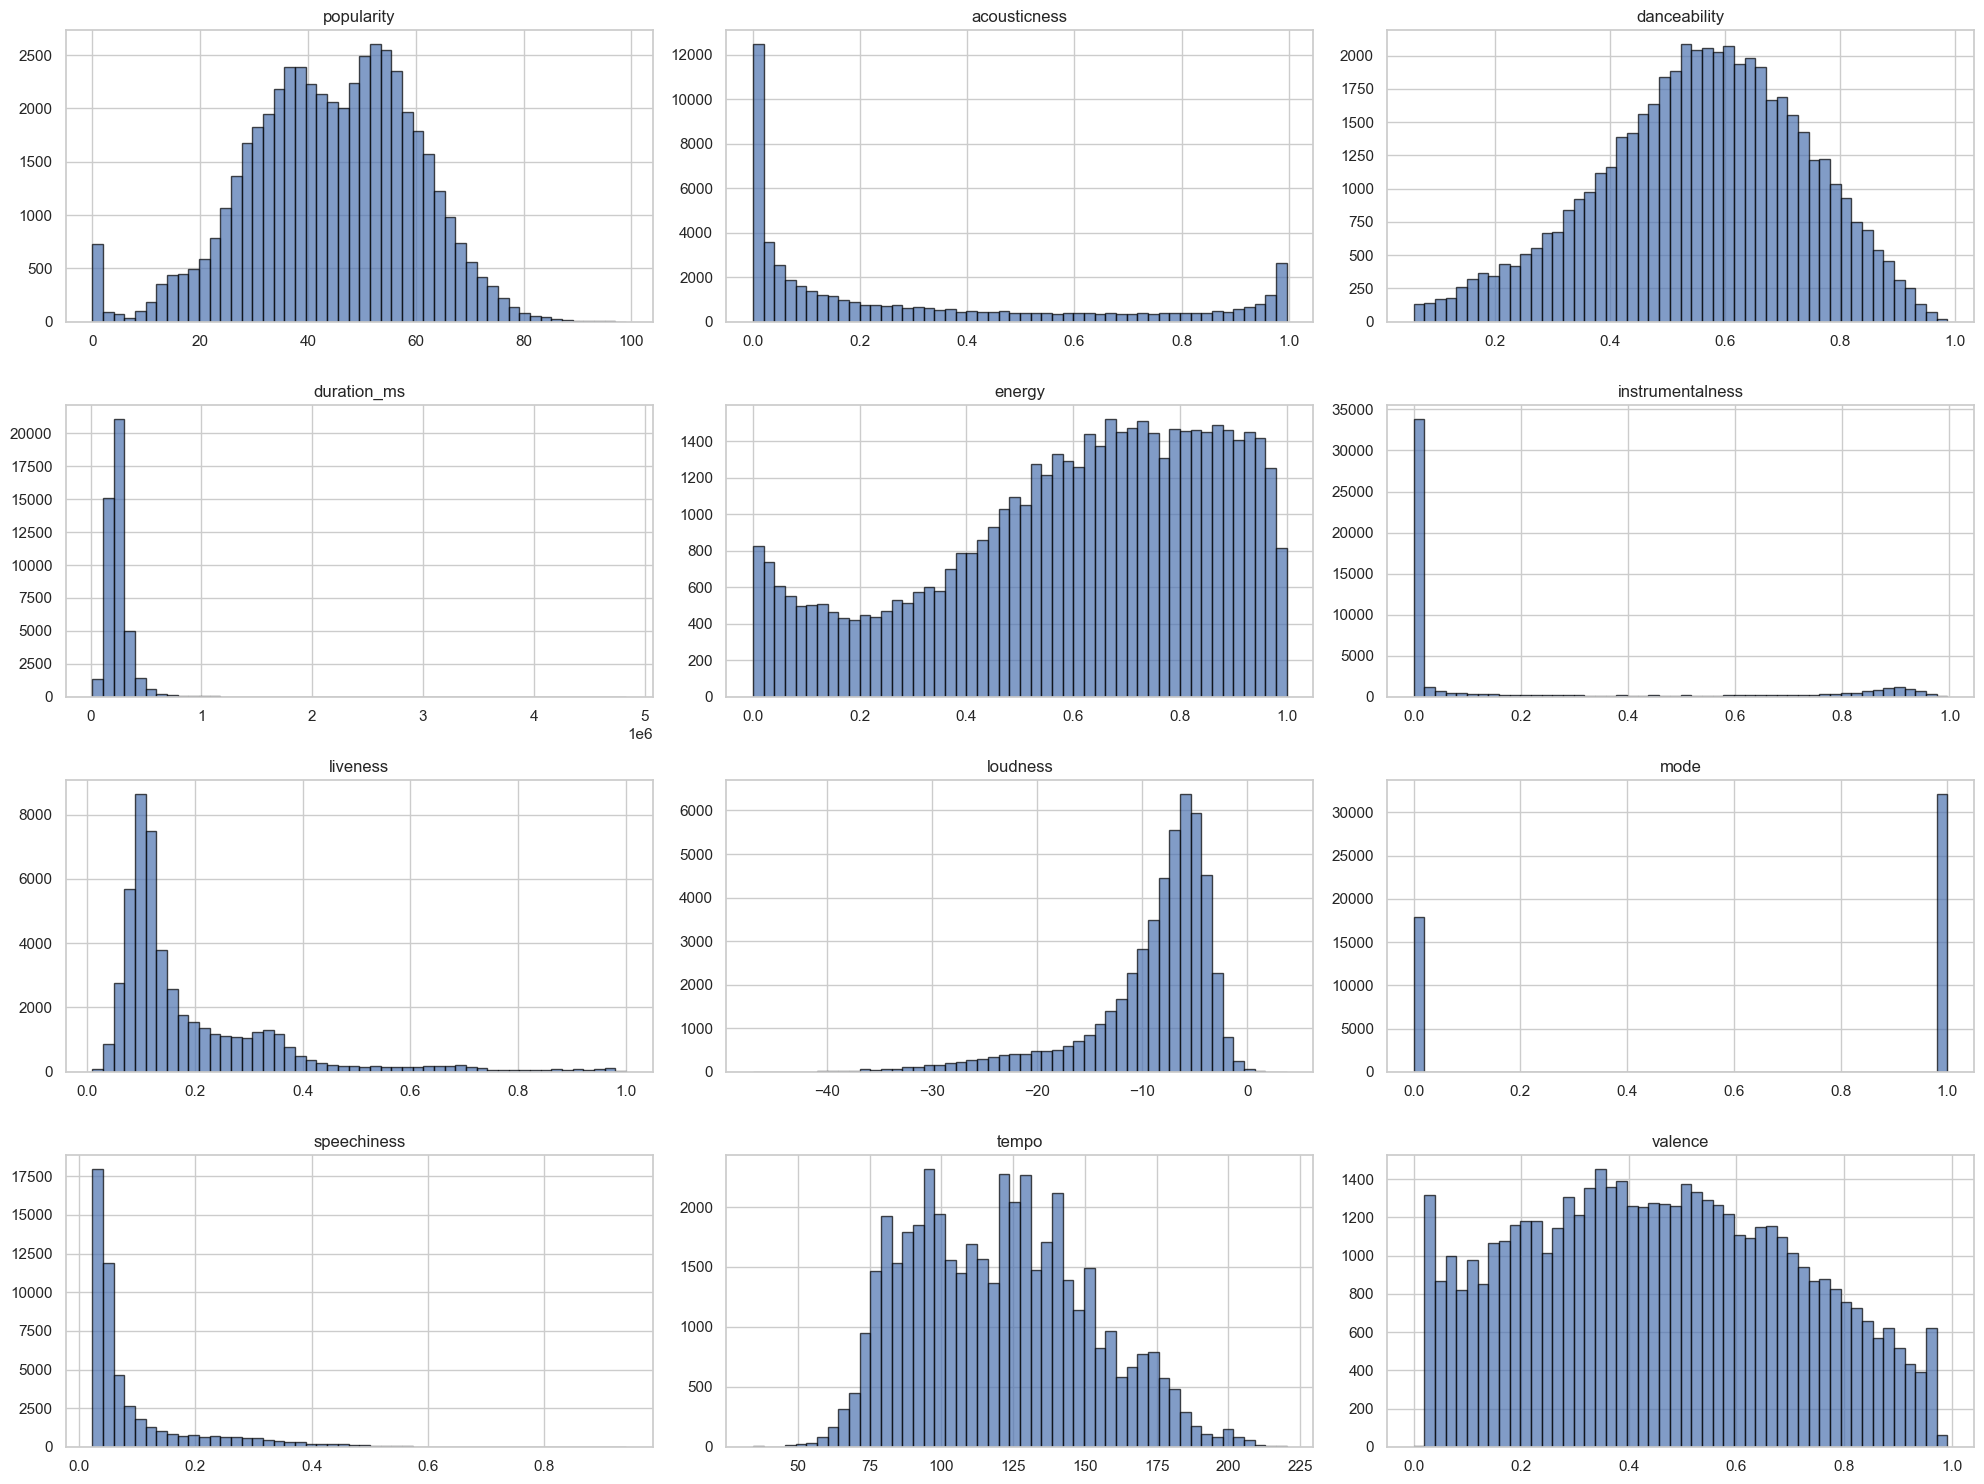

In [351]:
#Exclude the music genre and key columns
no_keys = cleaned_df.iloc[:, :12]

fig, axes = plt.subplots(4, 3, figsize=(20, 15)) 
axes = axes.flatten()

for i, feature in enumerate(no_keys.columns):
    data = no_keys[feature]
    axes[i].hist(data, bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f"{feature}")

plt.tight_layout()
plt.show()

In [352]:
#Impute using median
imputer = SimpleImputer(strategy='median')
impute_columns = ['tempo', 'duration_ms']
cleaned_df[impute_columns] = imputer.fit_transform(cleaned_df[impute_columns])

## Dimension Reduction

In [353]:
# Standardize numerical data
genre_column = cleaned_df['music_genre']
mode_column = cleaned_df['mode']
cleaned_df = cleaned_df.drop('mode', axis=1)
cleaned_df = cleaned_df.drop('music_genre', axis=1)

scaler = StandardScaler()
cleaned_df_scaled = scaler.fit_transform(cleaned_df)
cleaned_df_scaled = pd.DataFrame(cleaned_df_scaled, columns=cleaned_df.columns)

# Add the 'mode' column back to the DataFrame
cleaned_df_scaled['mode'] = mode_column.reset_index(drop=True)  # Ensure the index aligns

cleaned_df_scaled.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode
0,-1.108003,-0.883886,0.524878,-0.154369,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.655420,...,-0.352351,-0.348141,-0.343064,-0.18123,-0.285158,-0.308341,-0.257140,-0.359662,-0.266645,0
1,-0.850633,-0.860390,0.356933,-0.239968,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170027,...,-0.352351,-0.348141,2.914906,-0.18123,-0.285158,-0.308341,-0.257140,-0.359662,-0.266645,0
2,-1.043661,-0.888632,0.345737,-0.265269,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.276811,...,-0.352351,-0.348141,-0.343064,-0.18123,-0.285158,-0.308341,-0.257140,-0.359662,3.750304,1
3,-0.657606,-0.823184,1.207853,-0.725393,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.277499,...,-0.352351,2.872402,-0.343064,-0.18123,-0.285158,-0.308341,-0.257140,-0.359662,-0.266645,1
4,-0.786291,-0.883974,0.446504,-0.201488,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.862942,...,-0.352351,-0.348141,-0.343064,-0.18123,-0.285158,-0.308341,3.888937,-0.359662,-0.266645,1


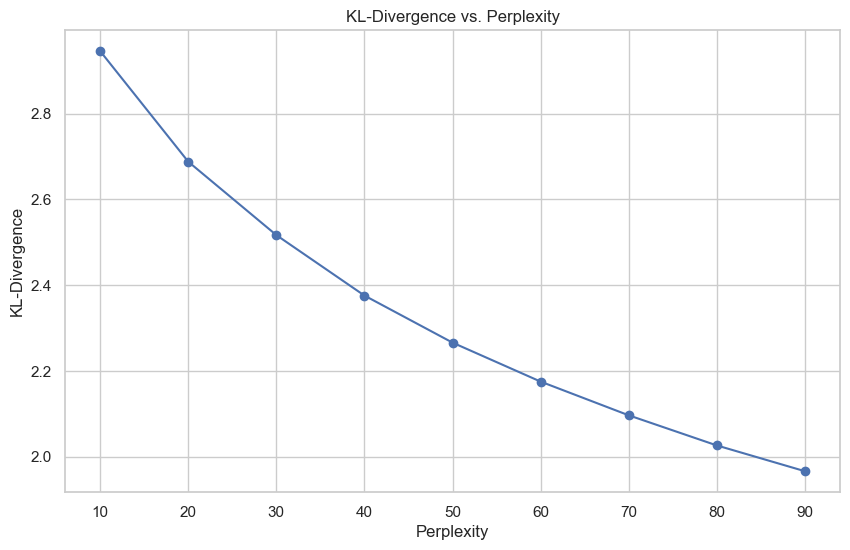

KeyboardInterrupt: 

In [285]:
import warnings
warnings.filterwarnings('ignore')

# perplexity from 10 to 90
perplexities = range(10, 100, 10)
kl_divergences = []

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=19250813)
    tsne_result = tsne.fit_transform(cleaned_df_scaled)
    kl_divergences.append(tsne.kl_divergence_)

# Plotting the relationship between perplexity and KL-divergence
plt.figure(figsize=(10, 6))
plt.plot(perplexities, kl_divergences, marker='o')
plt.title('KL-Divergence vs. Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL-Divergence')
plt.grid(True)
plt.show()


In [319]:
#t-SNE with perplexity of 10
tsne = TSNE(n_components=2, perplexity=10, random_state=19250813)
tsne_results_20 = tsne.fit_transform(cleaned_df_scaled)

Best silhouette score: 0.20138224959373474
Best epsilon: 2
Best min_samples: 15


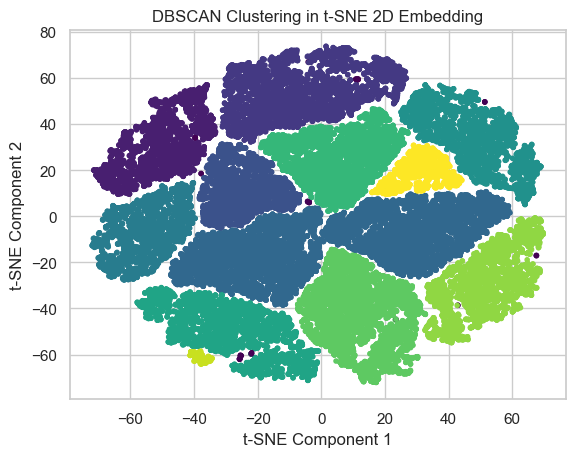

In [324]:
# Clustering with DBSCAN

# Hyperparameter tuning
eps_values = np.arange(1, 10, 1) 
min_samples_values = range(2, 20) 

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(tsne_results_20)
        if len(set(cluster_labels)) > 1 and len(set(cluster_labels)) < tsne_results_20.shape[0] - 1:
            score = silhouette_score(tsne_results_20, cluster_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameters and the corresponding score
print(f'Best silhouette score: {best_score}')
print(f'Best epsilon: {best_eps}')
print(f'Best min_samples: {best_min_samples}')


# Apply DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(tsne_results_20)

plt.scatter(tsne_results_20[:, 0], tsne_results_20[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering in t-SNE 2D Embedding')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Training and Evaluating Model

In [354]:
train_indices = []
test_indices = []
cleaned_df['music_genre'] = genre_column

# Split data for each genre 
for genre in cleaned_df['music_genre'].unique():
    genre_data = cleaned_df[cleaned_df['music_genre'] == genre]
    genre_train, genre_test = train_test_split(genre_data, test_size=500, train_size=4500, random_state=19250813) 
    train_indices.extend(genre_train.index)
    test_indices.extend(genre_test.index)

train_df = cleaned_df.loc[train_indices]
test_df = cleaned_df.loc[test_indices]

# Extract features and labels for training and testing
X_train = train_df.drop('music_genre', axis=1)
y_train = train_df['music_genre']
X_test = test_df.drop('music_genre', axis=1)
y_test = test_df['music_genre']

In [303]:
# Hyperparameter Tuning
param_grid = {
    'max_features': [0.2, 0.4, 0.6,None],     # Number of features to consider at every split
    'max_samples': [0.2, 0.4, 0.6, None],     # Fraction of samples to use for fitting each tree
}

rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=19250813)
scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scorer, cv = 5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)


Best parameters: {'max_features': 0.4, 'max_samples': 0.2}
Best AUC: 0.923019633744856


Overall ROC AUC Score: 0.92


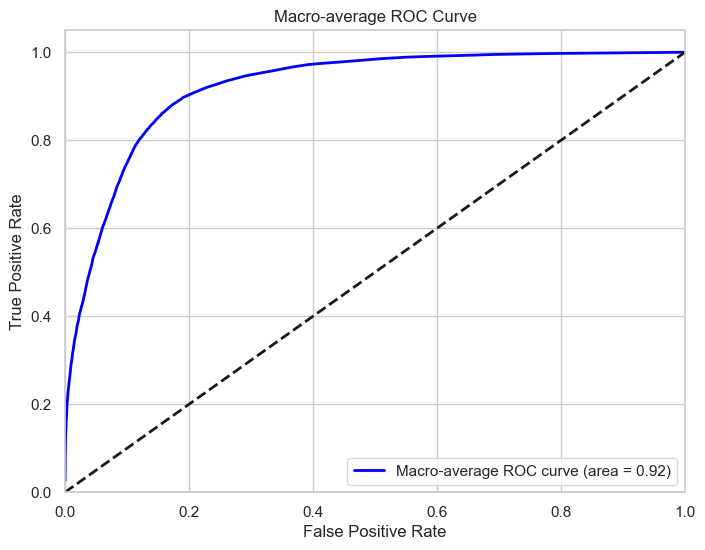

In [355]:
model = RandomForestClassifier(n_estimators=100, max_features=0.4, max_samples=0.2, bootstrap=True, random_state=19250813)

model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)

# Compute the ROC AUC score
overall_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')
print(f"Overall ROC AUC Score: {overall_auc:.2f}")

lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)

n_classes = y_probs.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_roc_auc = auc(all_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_tpr, color='blue', linestyle='-', linewidth=2,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(macro_roc_auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC Curve')
plt.legend(loc="lower right")
plt.show()

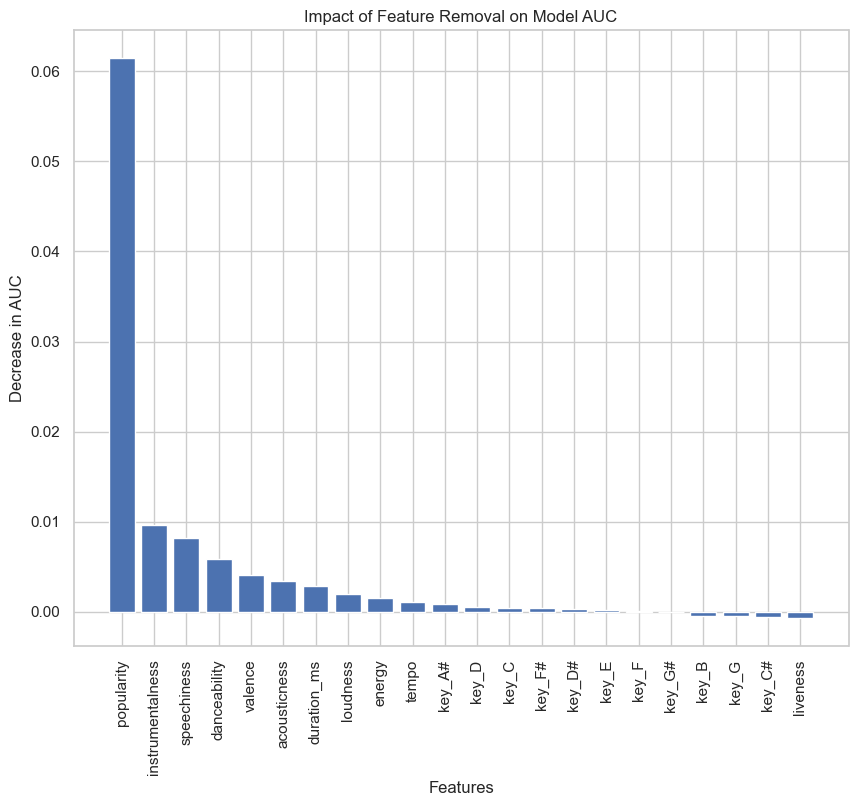

In [330]:
def evaluate_model(X_train, y_train, X_test, y_test):
    # Train the model
    model = RandomForestClassifier(n_estimators=100, max_features=0.4, max_samples=0.2, bootstrap=True, random_state=19250813)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_probs = model.predict_proba(X_test)

    # Compute macro-average ROC AUC
    lb = LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr', average='macro')
    return auc_score

baseline_auc = overall_auc

feature_aucs = {}
for column in X_train.columns:
    # Drop the column from both X_train and X_test
    X_train_reduced = X_train.drop(columns=[column])
    X_test_reduced = X_test.drop(columns=[column])

    # Evaluate the model with the reduced feature set
    auc_score = evaluate_model(X_train_reduced, y_train, X_test_reduced, y_test)
    feature_aucs[column] = auc_score
    
# Calculate the change in AUC for each feature
auc_changes = {feature: baseline_auc - auc for feature, auc in feature_aucs.items()}

# Sorting features by impact
features_sorted_by_impact = sorted(auc_changes.items(), key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar([item[0] for item in features_sorted_by_impact], [item[1] for item in features_sorted_by_impact])
plt.xlabel('Features')
plt.ylabel('Decrease in AUC')
plt.title('Impact of Feature Removal on Model AUC')
plt.xticks(rotation=90)
plt.show()